Importing the data from the UC Irvine machine Learning Repository

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [ ]:
#Extracting the features and the target values from the dataset...
heart_disease = fetch_ucirepo(id=45)
#extracting the features
heart_disease_features = heart_disease.data.features
#extracting the targets
heart_disease_targets = heart_disease.data.targets
heart_disease_multi_targets = heart_disease_targets.copy()
#data
heart_disease_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


Visualising the data

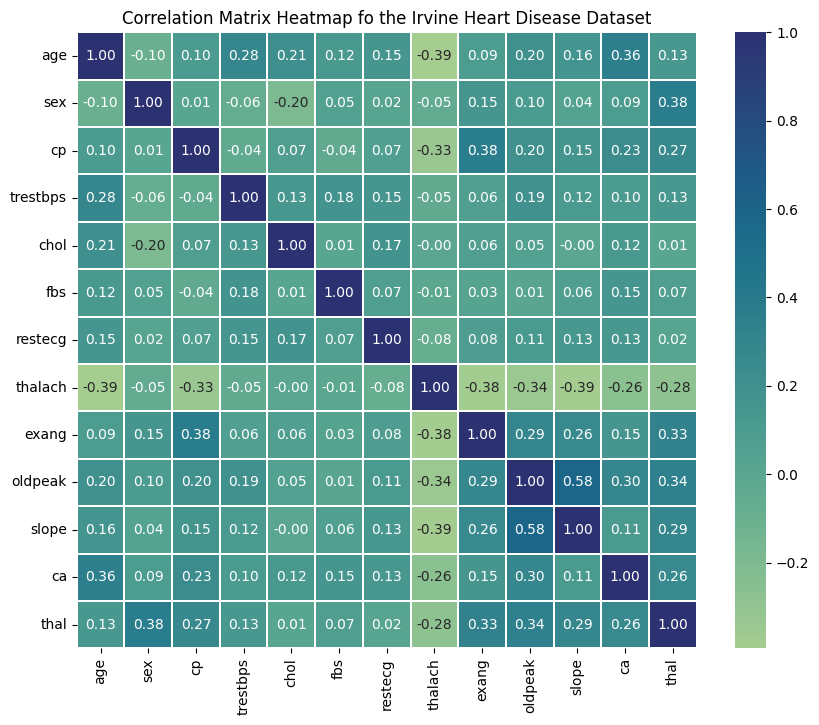

In [ ]:
#visualising the correlation matrix between different variables in the dataset
corr_matrix = heart_disease_features.corr()
corr_matrix


plt.figure(figsize=(10, 8))  # Optional: Changes the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix Heatmap fo the Irvine Heart Disease Dataset')
plt.show()

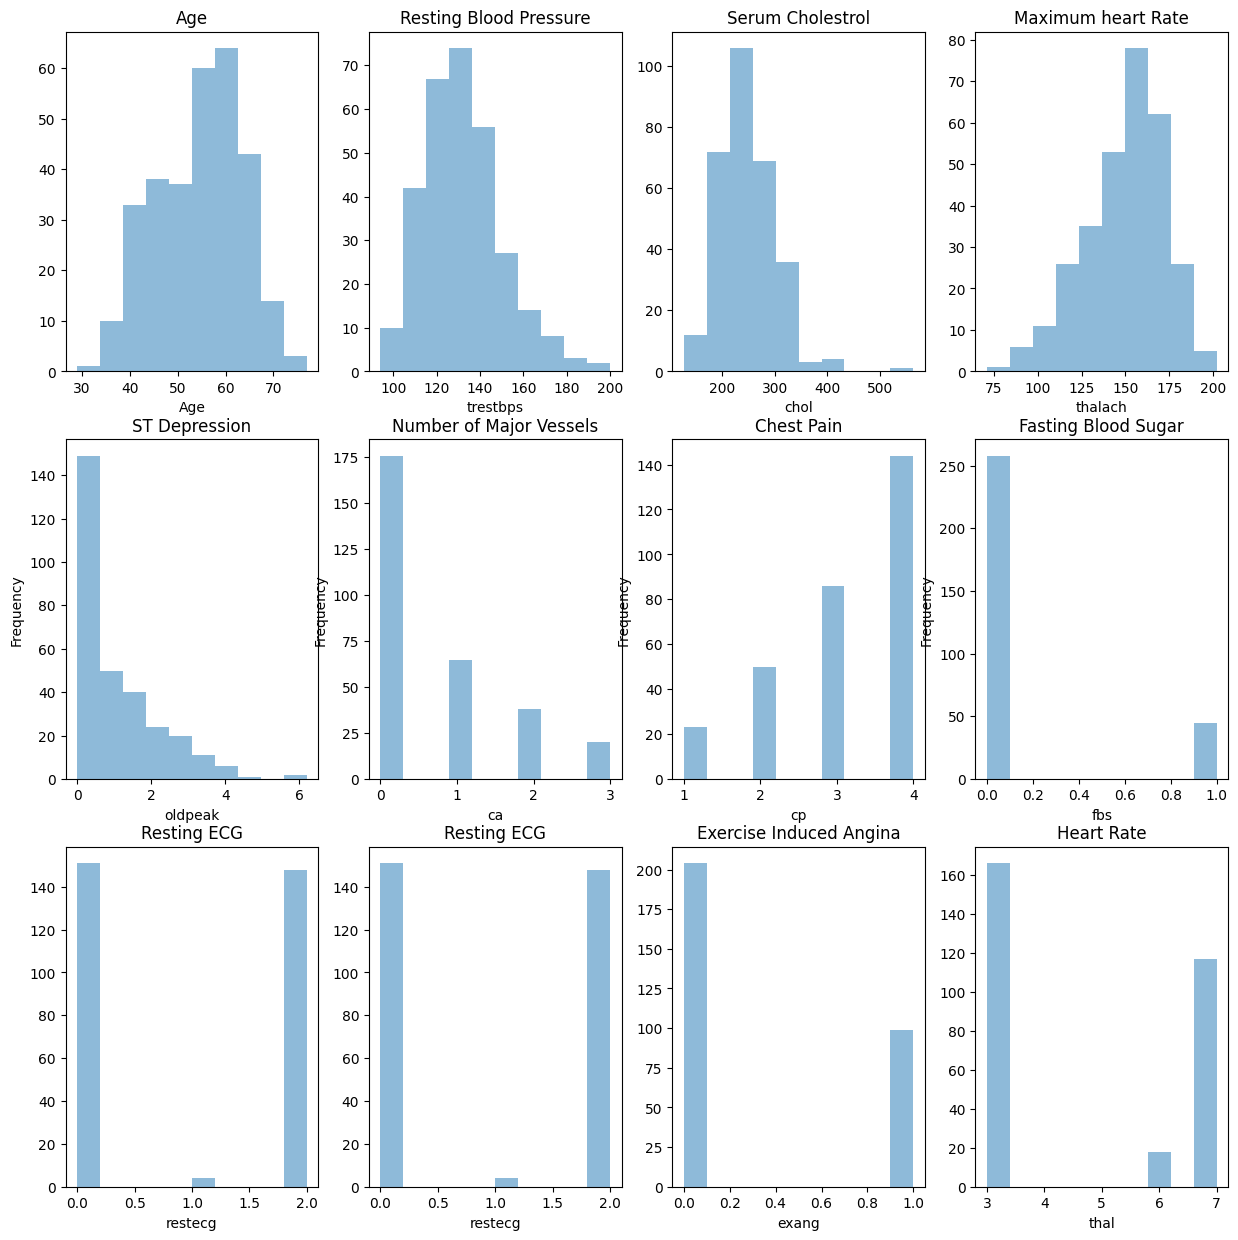

In [ ]:
#visualising the numerical data like age, tretbps (resting blood pressure, on admission), chol etc

fig, axs = plt.subplots(3, 4, figsize=(15, 15))  # Create a figure and a 2x1 subplot

axs[0,0].hist(heart_disease_features['age'], alpha=0.5)
axs[0,0].set_title("Age")
axs[0,0].set_xlabel("Age")
axs[0,1].hist(heart_disease_features['trestbps'], alpha=0.5)
axs[0,1].set_title("Resting Blood Pressure")
axs[0,1].set_xlabel("trestbps")
axs[0,2].hist(heart_disease_features['chol'], alpha=0.5)
axs[0,2].set_title("Serum Cholestrol")
axs[0,2].set_xlabel("chol")
axs[0,3].hist(heart_disease_features['thalach'], alpha=0.5)
axs[0,3].set_title("Maximum heart Rate")
axs[0,3].set_xlabel("thalach")
axs[1,0].hist(heart_disease_features['oldpeak'], alpha=0.5)
axs[1,0].set_title("ST Depression")
axs[1,0].set_xlabel("oldpeak")
axs[1,1].hist(heart_disease_features['ca'], alpha=0.5)
axs[1,1].set_title("Number of Major Vessels")
axs[1,1].set_xlabel("ca")
axs[1,2].hist(heart_disease_features['cp'], alpha=0.5)
axs[1,2].set_title("Chest Pain")
axs[1,2].set_xlabel("cp")
axs[1,3].hist(heart_disease_features['fbs'], alpha=0.5)
axs[1,3].set_title("Fasting Blood Sugar")
axs[1,3].set_xlabel("fbs")
axs[2,0].hist(heart_disease_features['restecg'], alpha=0.5)
axs[2,0].set_title("Resting ECG")
axs[2,0].set_xlabel("restecg")
axs[2,1].hist(heart_disease_features['restecg'], alpha=0.5)
axs[2,1].set_title("Resting ECG")
axs[2,1].set_xlabel("restecg")
axs[2,2].hist(heart_disease_features['exang'], alpha=0.5)
axs[2,2].set_title("Exercise Induced Angina")
axs[2,2].set_xlabel("exang")
axs[2,3].hist(heart_disease_features['thal'], alpha=0.5)
axs[2,3].set_title("Heart Rate")
axs[2,3].set_xlabel("thal")
for i in range(3):
    for j in range(4):
        axs[1, j].set_ylabel("Frequency")

Data Preprocessing.

In [ ]:
#Checking if there is any missing values in the dataset.
heart_disease_features.isna().any()

#Interpolating the data to fill the missing values
heart_disease_features.interpolate(method='linear',inplace=True)

#normalising the data
scaler = MinMaxScaler()

#Converting the targets from multiclass to binary, ie we will be focussing on predicting if the person has heart disease or not.
heart_disease_targets['num'] = heart_disease_targets['num'].apply(lambda x: 0 if x == 0 else 1)


heart_disease_features_norm = pd.DataFrame(scaler.fit_transform(heart_disease_features), columns=heart_disease_features.columns)

#visiualising the data after normalisation
print(heart_disease_features_norm.head())

#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(heart_disease_features_norm, heart_disease_targets, test_size=0.2, random_state=42)

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  


<ipython-input-4-797c28d50269>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_features.interpolate(method='linear',inplace=True)
<ipython-input-4-797c28d50269>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_targets['num'] = heart_disease_targets['num'].apply(lambda x: 0 if x == 0 else 1)


Performing Classification task on the data. We will be focussing on Logistic regression, KNN and SVM. Here our focus is on binary classification ie, we will be focussing only if the person has heart disease or not.*italicized text*

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.8347107438016529
Test Accuracy: 0.8852459016393442
Precisoon Score: 0.8854765453126109


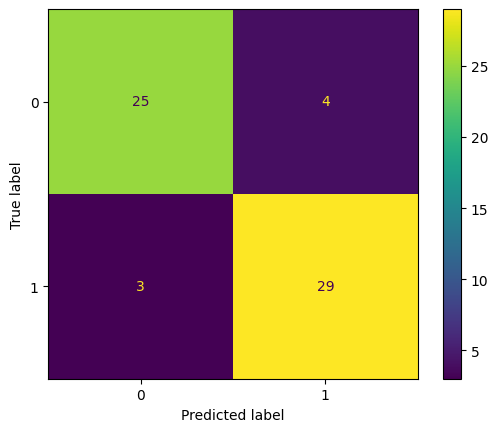

In [ ]:
#logistic Regression

model_1 = LogisticRegression()
model_1.fit(X_train, Y_train)

Y_pred_train_lr = model_1.predict(X_train)
Y_pred_test_lr = model_1.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_lr))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_lr))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_lr,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_lr, labels=model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_1.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.8677685950413223
Test Accuracy: 0.7868852459016393
Precisoon Score: 0.8323965651834504


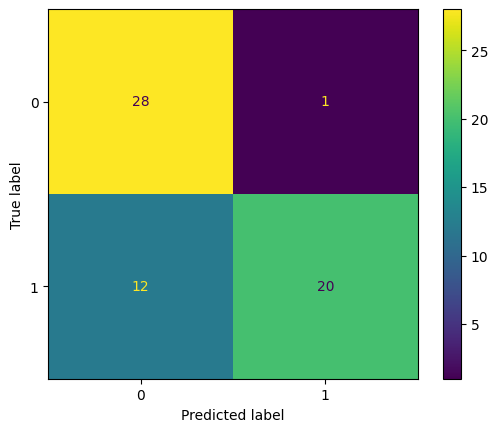

In [ ]:
#KNN

model_2 = KNeighborsClassifier(n_neighbors=2)

model_2.fit(X_train,Y_train)

Y_pred_train_knn = model_2.predict(X_train)
Y_pred_test_knn = model_2.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_knn))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_knn))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_knn,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_knn, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_2.classes_)
disp.plot()
plt.show()

Train Accuracy: 0.8677685950413223
Test Accuracy: 0.7868852459016393
Precisoon Score: 0.8323965651834504


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


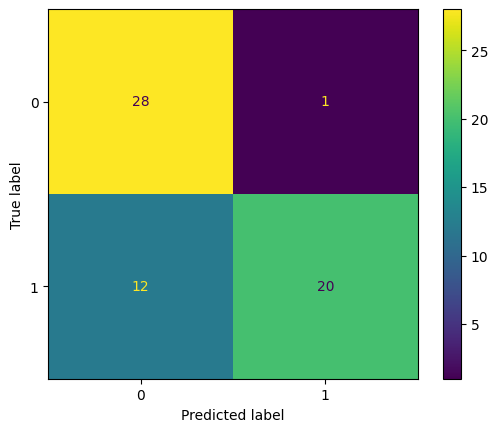

In [ ]:
#svm

model_3 = svm.SVC()
model_3.fit(X_train, Y_train)

Y_pred_train_svm = model_2.predict(X_train)
Y_pred_test_svm = model_2.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_svm))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_svm))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_svm,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_svm, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_2.classes_)
disp.plot()
plt.show()

Performing Multiclass Classification task on the data. We will be focussing on Logistic regression, KNN and SVM. There are five classes

1.   0: No heart Disease
2.   1,2,3,4: varying stages of heart disease

In [ ]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(heart_disease_features_norm, heart_disease_multi_targets, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.6570247933884298
Test Accuracy: 0.5245901639344263
Precisoon Score: 0.46177739430543574


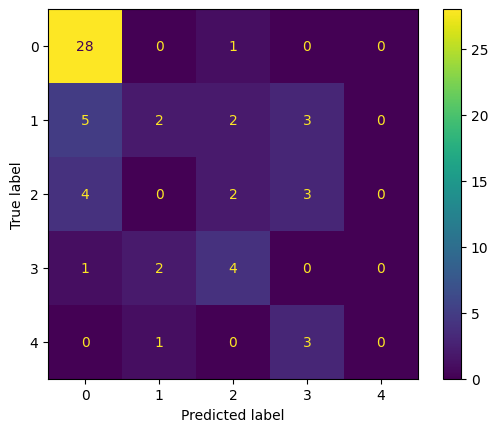

In [ ]:
#logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_train_lr = lr.predict(X_train)
Y_pred_test_lr = lr.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_lr))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_lr))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_lr,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.6859504132231405
Test Accuracy: 0.5573770491803278
Precisoon Score: 0.4651853544296567


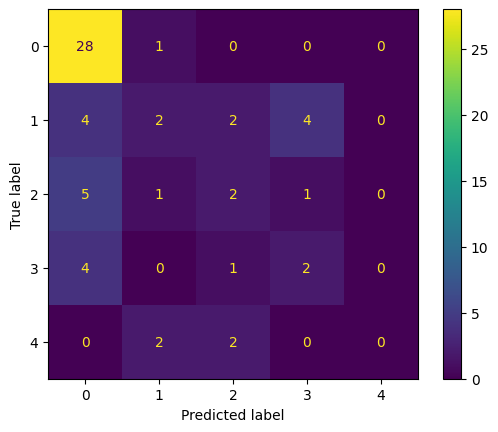

In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_knn))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_knn))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_knn,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.6157024793388429
Test Accuracy: 0.6065573770491803
Precisoon Score: 0.4913273400317293


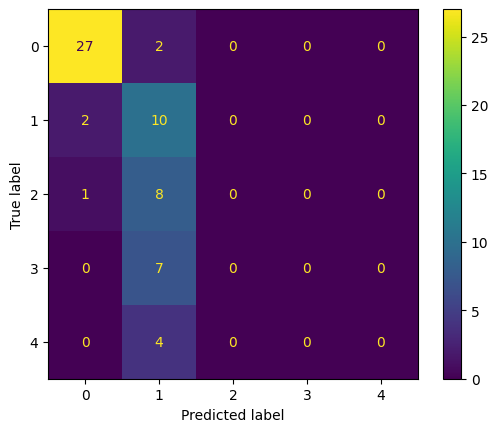

In [ ]:
#SVM

svm = svm.SVC()
svm.fit(X_train, Y_train)

Y_pred_train_svm = model_3.predict(X_train)
Y_pred_test_svm = model_3.predict(X_test)


print("Train Accuracy:", accuracy_score(Y_train, Y_pred_train_svm))
print("Test Accuracy:", accuracy_score(Y_test, Y_pred_test_svm))
print("Precisoon Score:", precision_score(Y_test, Y_pred_test_svm,average='weighted'))

cm = confusion_matrix(Y_test, Y_pred_test_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)
disp.plot()
plt.show()

Performing Multiclass Classification task on the data. To mitigate thtough the issue of class imbalance, we will be introducing oversampling to the data using the SMOTE technique. We will be focussing on Logistic regression, KNN and SVM. There are five classes

1.   0: No heart Disease
2.   1,2,3,4: varying stages of heart disease

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
hdfd = heart_disease.data.features
hdtd = heart_disease_multi_targets
hdfd.interpolate(method='linear',inplace=True)
X_resampled, Y_resampled = smote.fit_resample(hdfd, hdtd)

<ipython-input-24-a1ef4d4a0723>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfd.interpolate(method='linear',inplace=True)


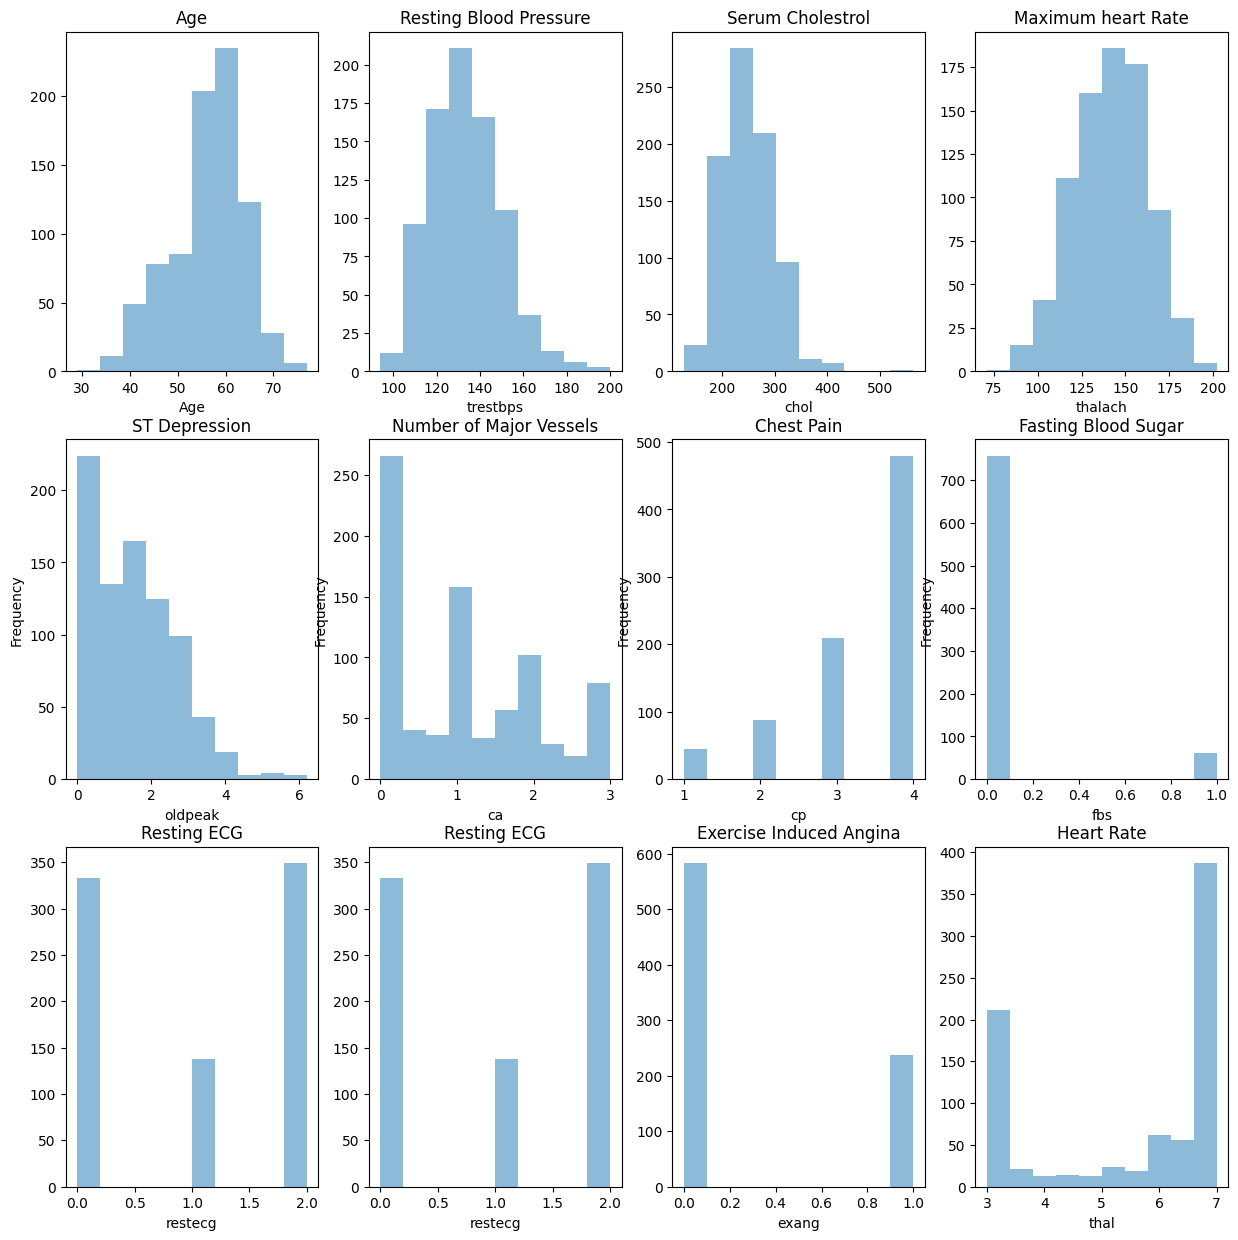

In [ ]:
#Visualising the data after oversampling
fig, axs = plt.subplots(3, 4, figsize=(15, 15))  # Create a figure and a 2x1 subplot

axs[0,0].hist(X_resampled['age'], alpha=0.5)
axs[0,0].set_title("Age")
axs[0,0].set_xlabel("Age")
axs[0,1].hist(X_resampled['trestbps'], alpha=0.5)
axs[0,1].set_title("Resting Blood Pressure")
axs[0,1].set_xlabel("trestbps")
axs[0,2].hist(X_resampled['chol'], alpha=0.5)
axs[0,2].set_title("Serum Cholestrol")
axs[0,2].set_xlabel("chol")
axs[0,3].hist(X_resampled['thalach'], alpha=0.5)
axs[0,3].set_title("Maximum heart Rate")
axs[0,3].set_xlabel("thalach")
axs[1,0].hist(X_resampled['oldpeak'], alpha=0.5)
axs[1,0].set_title("ST Depression")
axs[1,0].set_xlabel("oldpeak")
axs[1,1].hist(X_resampled['ca'], alpha=0.5)
axs[1,1].set_title("Number of Major Vessels")
axs[1,1].set_xlabel("ca")
axs[1,2].hist(X_resampled['cp'], alpha=0.5)
axs[1,2].set_title("Chest Pain")
axs[1,2].set_xlabel("cp")
axs[1,3].hist(X_resampled['fbs'], alpha=0.5)
axs[1,3].set_title("Fasting Blood Sugar")
axs[1,3].set_xlabel("fbs")
axs[2,0].hist(X_resampled['restecg'], alpha=0.5)
axs[2,0].set_title("Resting ECG")
axs[2,0].set_xlabel("restecg")
axs[2,1].hist(X_resampled['restecg'], alpha=0.5)
axs[2,1].set_title("Resting ECG")
axs[2,1].set_xlabel("restecg")
axs[2,2].hist(X_resampled['exang'], alpha=0.5)
axs[2,2].set_title("Exercise Induced Angina")
axs[2,2].set_xlabel("exang")
axs[2,3].hist(X_resampled['thal'], alpha=0.5)
axs[2,3].set_title("Heart Rate")
axs[2,3].set_xlabel("thal")
for i in range(3):
    for j in range(4):
        axs[1, j].set_ylabel("Frequency")

In [ ]:
X_resampled_norm = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X_resampled.columns)

#visiualising the data after normalisation
print(X_resampled_norm.head())

#splitting the data into train and test
X_train_o, X_test_o, Y_train_o, Y_test_o = train_test_split(X_resampled_norm, Y_resampled, test_size=0.2, random_state=42)

        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  


Train Accuracy: 0.5655487804878049
Test Accuracy: 0.5548780487804879
Precisoon Score: 0.5478688426590148


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


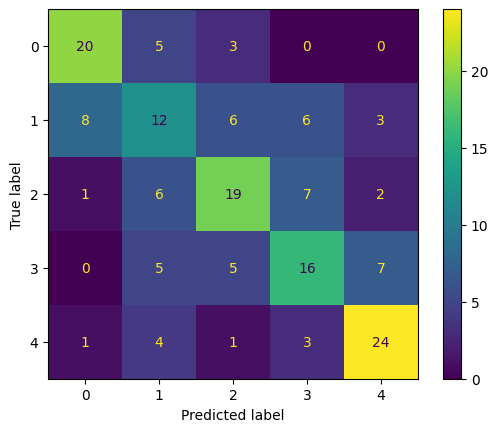

In [ ]:
#logistic Regression

model_1_lr = LogisticRegression()

model_1_lr.fit(X_train_o, Y_train_o)

Y_pred_train_o_lr = model_1_lr.predict(X_train_o)
Y_pred_test_o_lr = model_1_lr.predict(X_test_o)


print("Train Accuracy:", accuracy_score(Y_train_o, Y_pred_train_o_lr))
print("Test Accuracy:", accuracy_score(Y_test_o, Y_pred_test_o_lr))
print("Precisoon Score:", precision_score(Y_test_o, Y_pred_test_o_lr,average='weighted'))

cm = confusion_matrix(Y_test_o, Y_pred_test_o_lr, labels=model_1_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_1_lr.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Accuracy: 0.7865853658536586
Test Accuracy: 0.6951219512195121
Precisoon Score: 0.7093202363350408


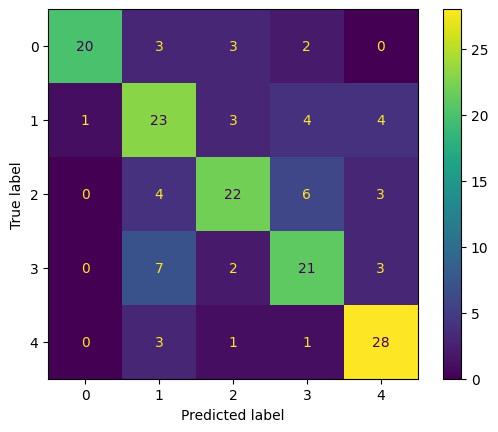

In [ ]:
#knn
model_2_k = KNeighborsClassifier(n_neighbors=5)
model_2_k.fit(X_train_o, Y_train_o)

Y_pred_train_o_knn = model_2_k.predict(X_train_o)
Y_pred_test_o_knn = model_2_k.predict(X_test_o)


print("Train Accuracy:", accuracy_score(Y_train_o, Y_pred_train_o_knn))
print("Test Accuracy:", accuracy_score(Y_test_o, Y_pred_test_o_knn))
print("Precisoon Score:", precision_score(Y_test_o, Y_pred_test_o_knn,average='weighted'))

cm = confusion_matrix(Y_test_o, Y_pred_test_o_knn, labels=model_2_k.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_2_k.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy: 0.7210365853658537
Test Accuracy: 0.6402439024390244
Precisoon Score: 0.6449119104045291


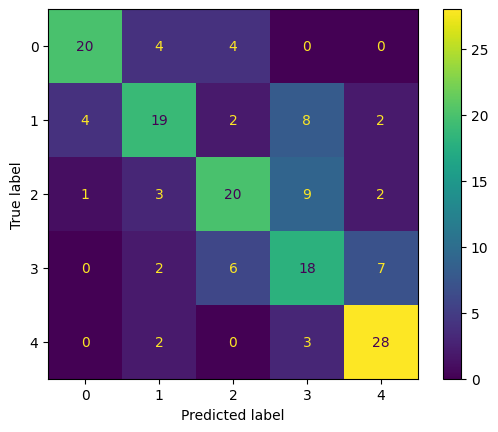

In [ ]:
model_3.fit(X_train_o, Y_train_o)

Y_pred_train_o_svm = model_3.predict(X_train_o)
Y_pred_test_o_svm = model_3.predict(X_test_o)


print("Train Accuracy:", accuracy_score(Y_train_o, Y_pred_train_o_svm))
print("Test Accuracy:", accuracy_score(Y_test_o, Y_pred_test_o_svm))
print("Precisoon Score:", precision_score(Y_test_o, Y_pred_test_o_svm,average='weighted'))

cm = confusion_matrix(Y_test_o, Y_pred_test_o_svm, labels=model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_3.classes_)
disp.plot()
plt.show()

Miscellaneous

In [ ]:
#Visualising the relation between age and having a heart disease

data = pd.concat([heart_disease_features,heart_disease_multi_targets], axis=1)

with_disease = data[data['num'] >= 0]['age']
without_disease = data[data['num'] == 0]['age']

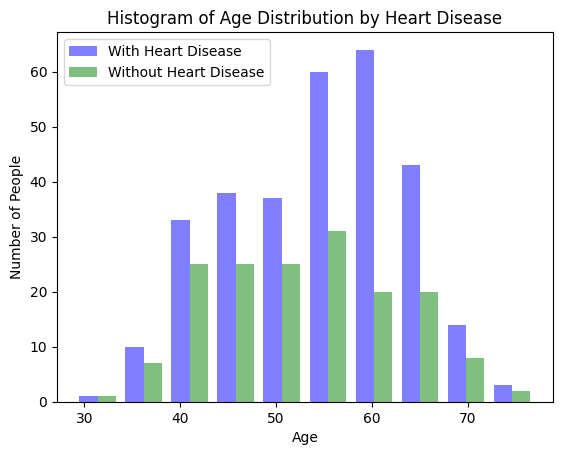

In [ ]:
plt.hist([with_disease, without_disease], bins=10, color=['blue', 'green'], label=['With Heart Disease', 'Without Heart Disease'], alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Histogram of Age Distribution by Heart Disease')
plt.legend()

# Show plot
plt.show()

In [ ]:
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


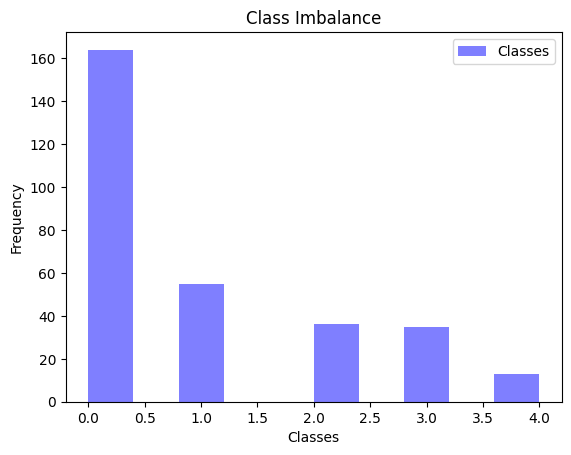

In [ ]:
plt.hist(data['num'], color='blue', label='Classes', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Imbalance')
plt.legend()


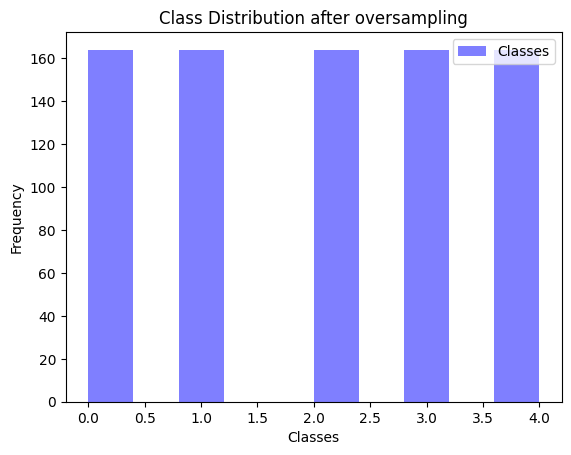

In [ ]:
plt.hist(pd.concat([Y_train_o,Y_test_o]), color='blue', label='Classes', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution after oversampling')
plt.legend()